In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

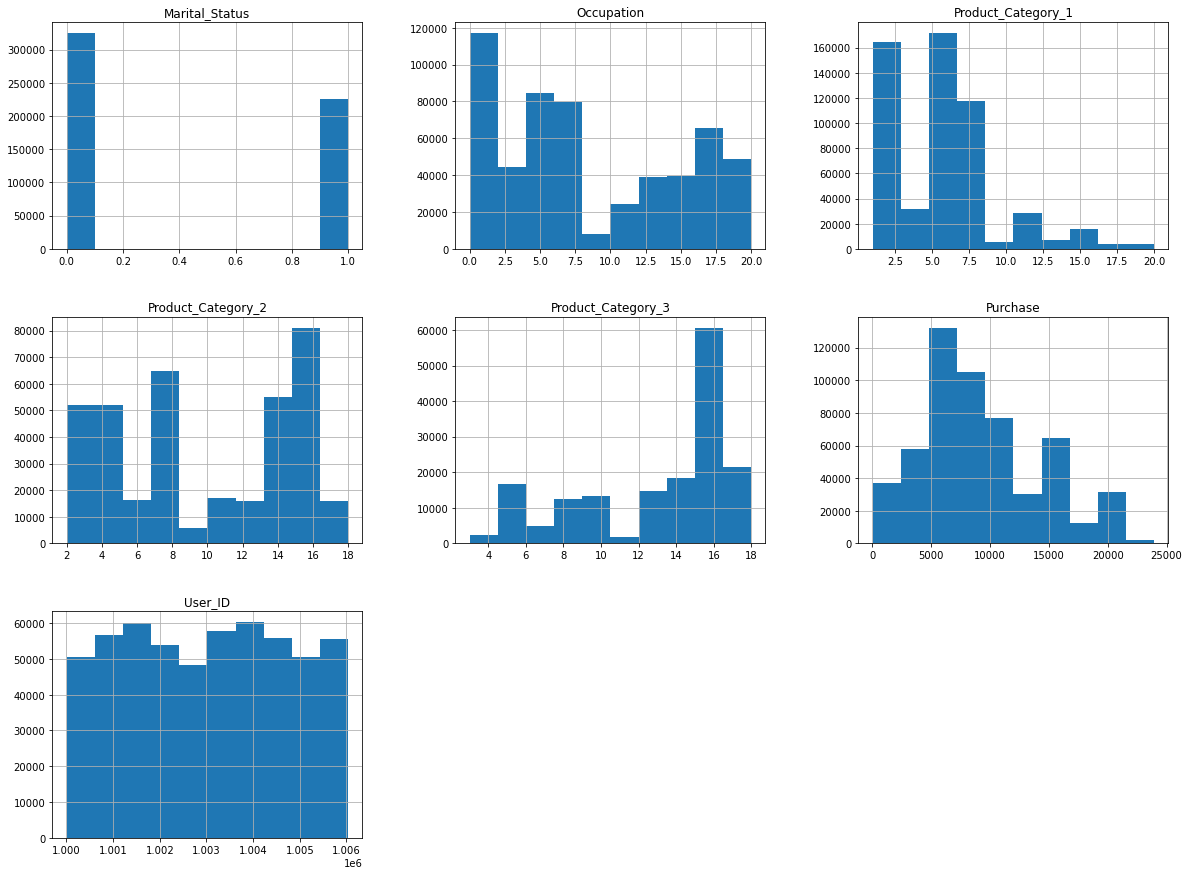

In [8]:
train.hist(bins=10, figsize=(20,15)) #plot is used to verify skewness (Symmetry around mean) and Kurtosis( tail heavy or not)
plt.show()

In [9]:
def univar_analysis_num(data, var_group):
    
    size = len(var_group)
    plt.figure(figsize = (7*size, 3)) #, dpi=100)
    
    for j,i in enumerate(var_group):
        #calculate description variables
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max() - data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        std_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()
        
        #calculating point of standard deviation
        points = mean - std_dev, mean+std_dev
        
        #Plotting the variable with every information
        plt.subplot(1, size, j+1)
        sns.kdeplot(data[i], shade=True, color='LightGreen')
        sns.lineplot(points, [0,0], color = 'black', label = 'std_dev')
        sns.scatterplot([mini, maxi], [0,0], color='orange', label='min/max')
        sns.scatterplot([mean], [0], color = 'red', label = 'mean')
        sns.scatterplot([median], [0], color = 'blue', label = 'median')
        plt.xlabel('{}'.format(i), fontsize=20)
        plt.ylabel('density')
        plt.title('std dev = {}; kurtosis = {};\nskew = {}; range = {};\nmean = {}; median = {}'.format((round(points[0],2),
                                                                                                        round(points[1], 2)),
                                                                                                        round(kurt,2),
                                                                                                        round(skew,2),
                                                                                                        (round(mini,2),
                                                                                                        round(maxi,2),
                                                                                                        round(ran,2)),
                                                                                                        round(mean,2),
                                                                                                        round(median,2)))
    

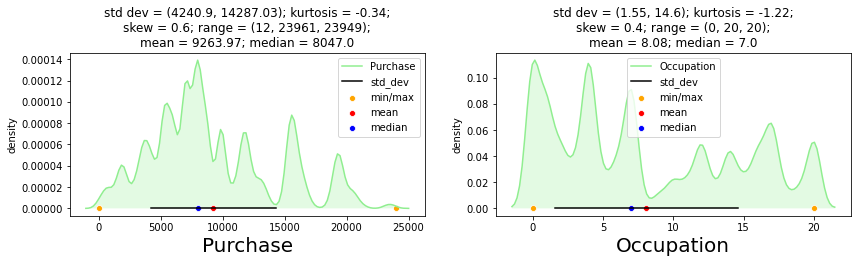

In [10]:
univar_analysis_num(train, ['Purchase', 'Occupation'])

In [11]:
def univar_analysis_cat(data, var_group):
    size = len(var_group)
    plt.figure(figsize =(8*size,7), dpi=100)
    
    for j, i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize=True)
        n_uni = data[i].nunique()
        
        #Plotting variable with all information
        plt.subplot(1, size, j+1)
        graph2 = sns.countplot(y=i, data=data, order=data[i].value_counts().index, palette = 'Set2')
        for p in graph2.patches:
            graph2.annotate(s='{:.0f}'.format(p.get_width()), xy=(p.get_width()+0.1,p.get_y()+0.5))
            
        plt.xlabel('fraction/percent', fontsize=20)
        plt.ylabel('{}'.format(i), fontsize=20)
        plt.title('n_unique = {}\n value counts \n {}'.format(n_uni, norm_count))

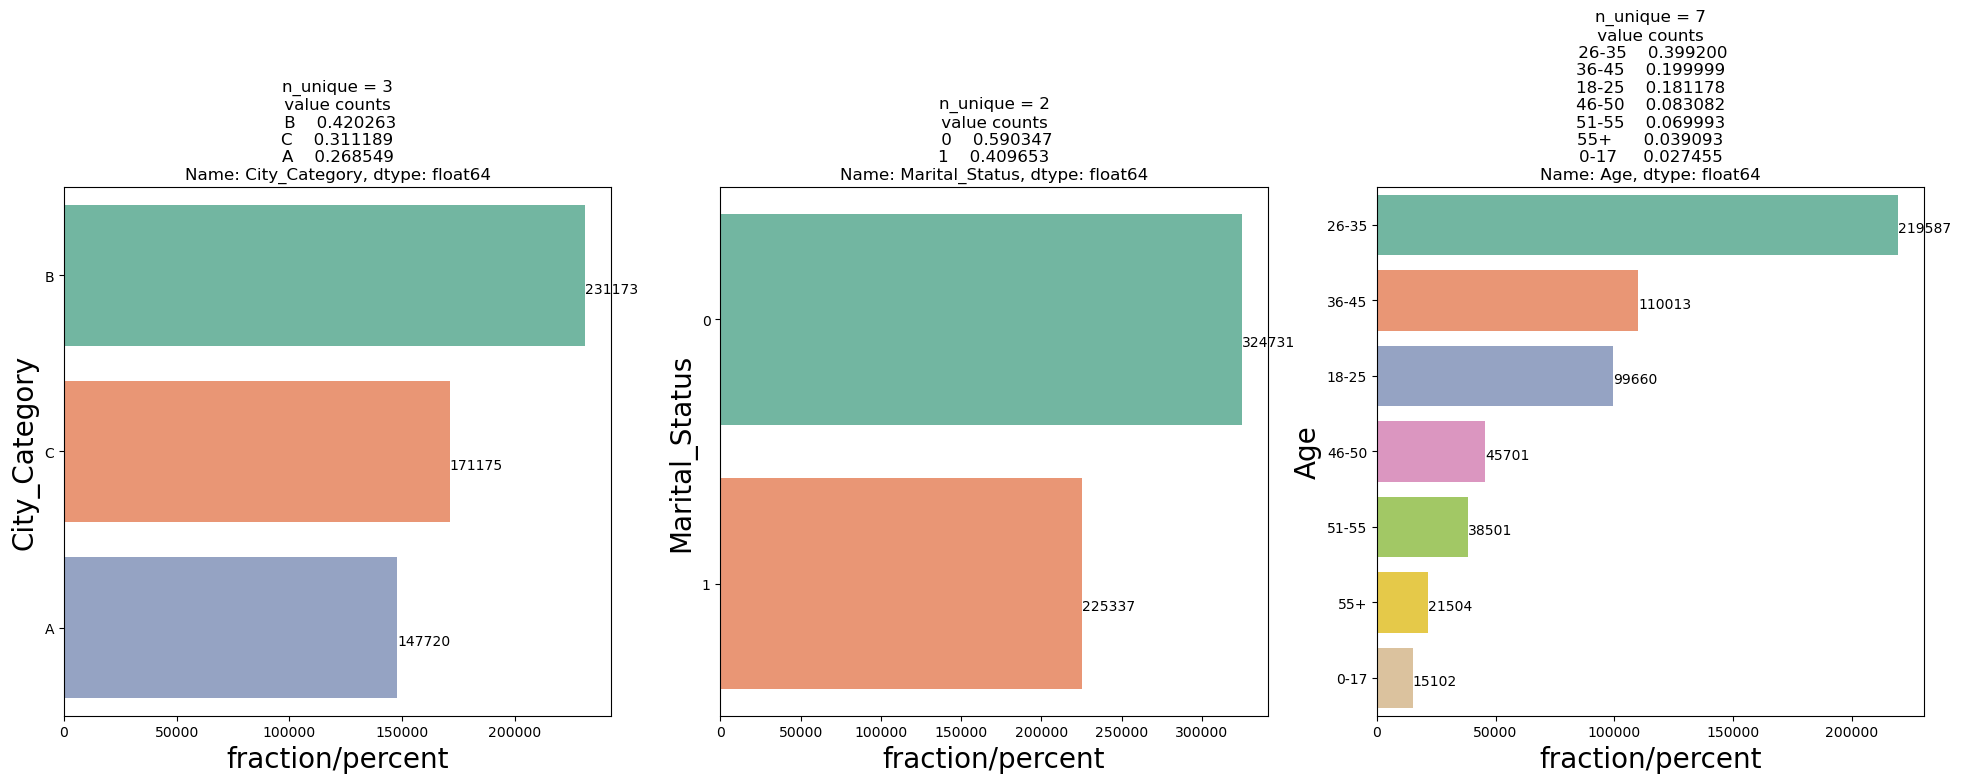

In [12]:
univar_analysis_cat(train, ['City_Category', 'Marital_Status', 'Age' ])

In [13]:
def biv_analysis(data, feature):
    pivot = data.pivot_table(index=feature, values='Purchase', aggfunc=np.mean)
    plt.figure(figsize=(15,6), dpi=140)
    plt.subplot(121)
    sns.barplot(x=feature, y='Purchase', data=data, palette = 'Set2', ci=None)
    plt.title('{} And Purchase Analysis'.format(feature))
    plt.ylabel('Average Purchase')
    
    plt.subplot(122)
    sns.boxplot(x=feature, y='Purchase', data=data, palette='Set3')
    plt.title('{}'.format(feature))

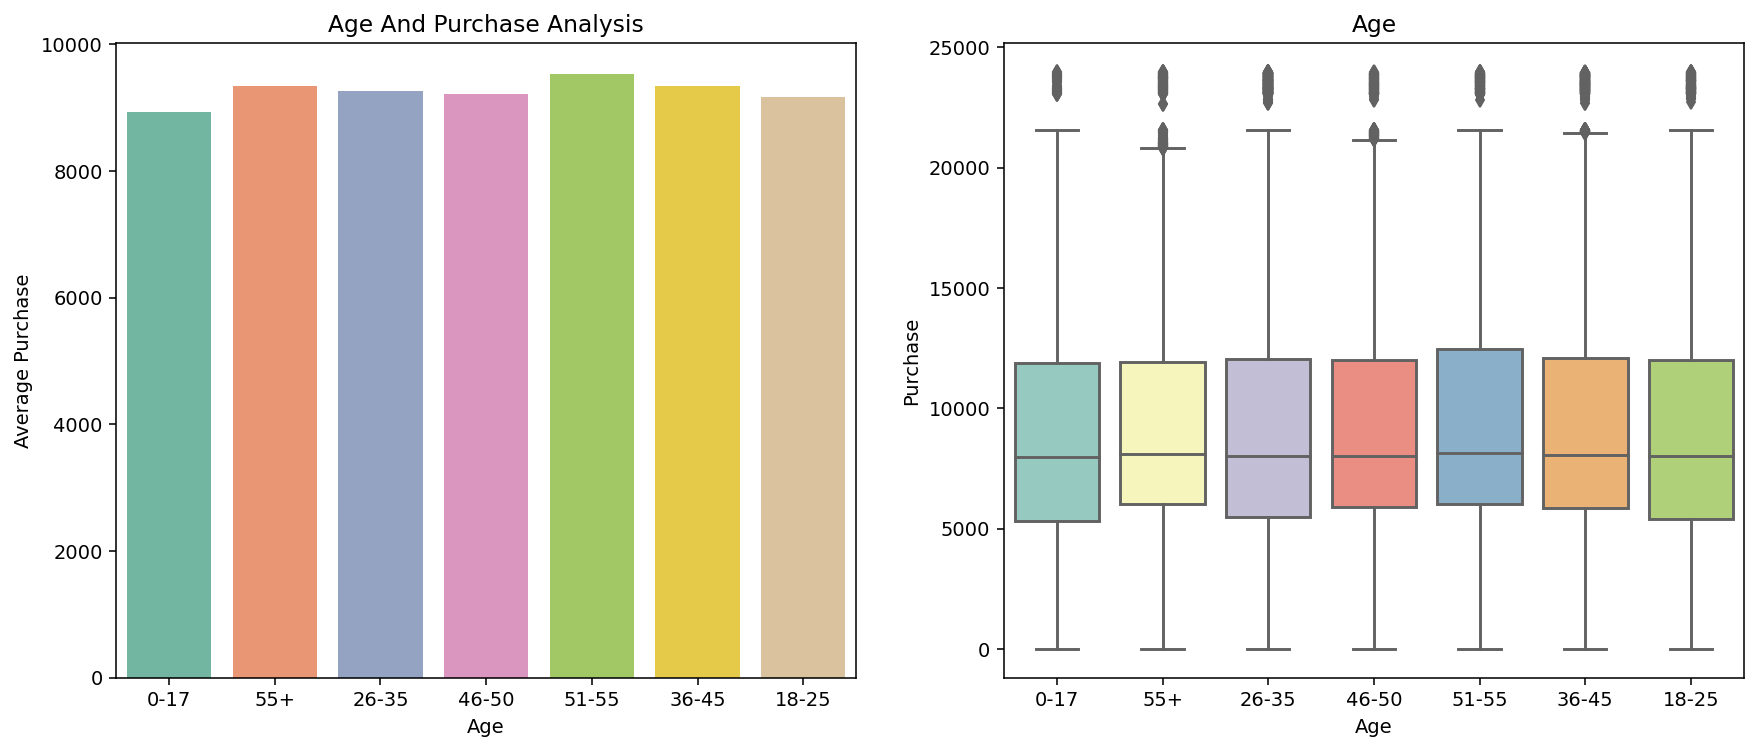

In [14]:
biv_analysis(train, 'Age')

In [15]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
    
    from numpy import sqrt, abs, round
    from scipy.stats import t as t_dist
    
    ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
    t = (X1 - X2)/ovr_sd
    df = n1+n2-2
    
    pval = 2*(1-t_dist.cdf(abs(t),df))
    return pval

In [16]:
def Bivariate_cont_cat(data, cont, cat, category):
    # creating two samples
    X1 = data[cont][data[cat] == category][:]
    X2 = data[cont][~(data[cat] == category)][:]
    
    #calculating descriptives
    n1, n2 = X1.shape[0], X2.shape[0]
    m1, m2 = X1.mean(), X2.mean()
    std1, std2 = X1.std(), X2.std()
    
    #calculating p-value
    t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2) 
    
    #table
    table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc=np.mean)
    
    #plotting
    plt.figure(figsize=(15,6), dpi=140)
    
    #barplot
    plt.subplot(121)
    sns.barplot([str(category), 'not {}'.format(category)], [m1,m2], palette='Set2')
    plt.ylabel('mean {}'.format(cont))
    plt.xlabel(cat)
    plt.title('t-test p-val = {}'.format(t_p_val))
    
    #boxplot
    plt.subplot(122)
    sns.boxplot(x=cat, y=cont, data=data, palette='Set3')
    plt.title('categorical boxplot')

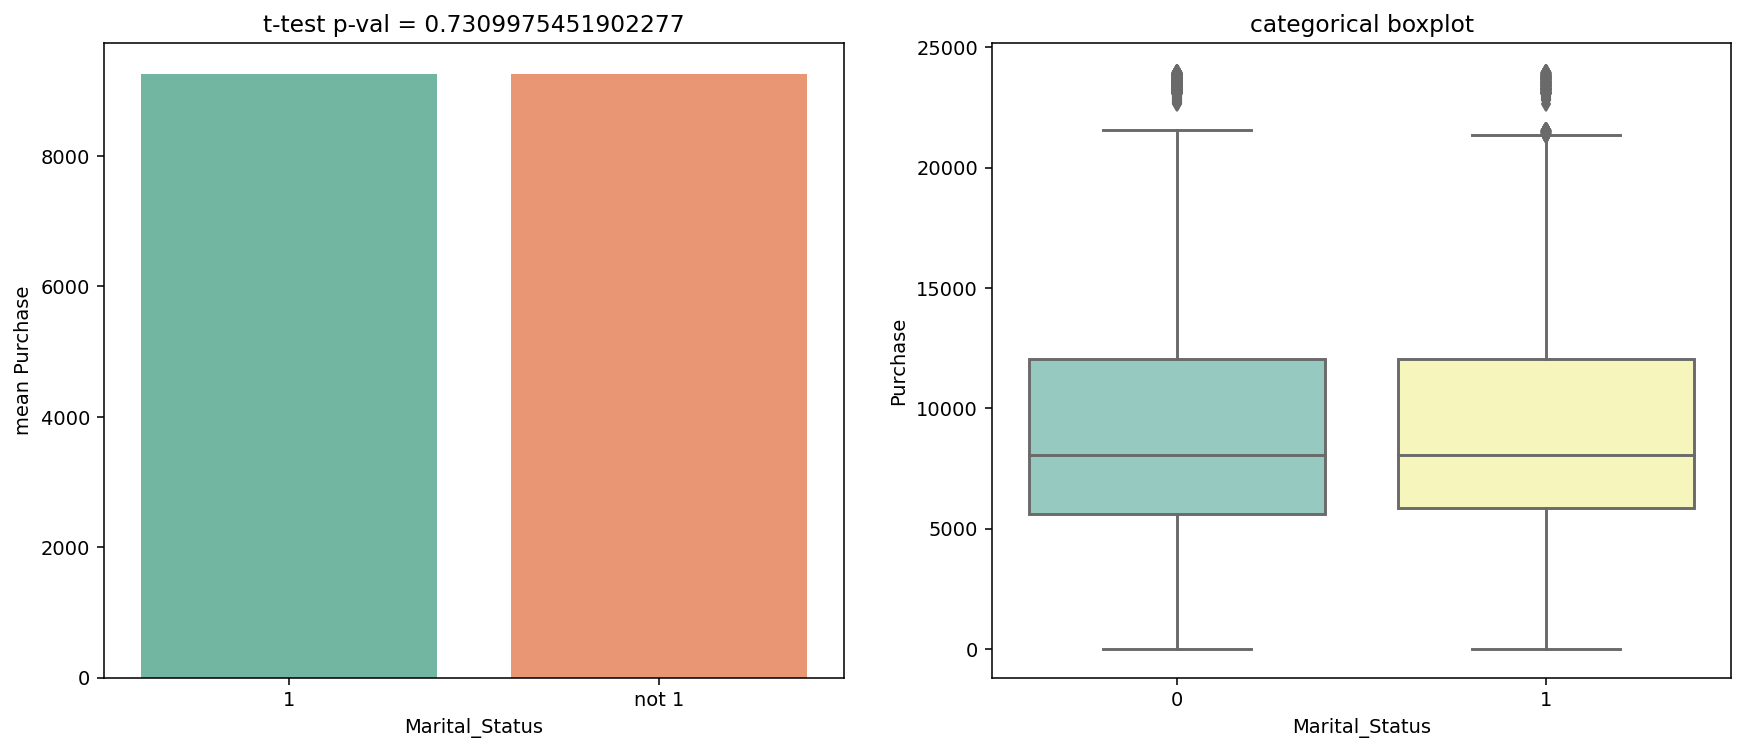

In [17]:
Bivariate_cont_cat(train, 'Purchase', 'Marital_Status', 1)

In [18]:
corr_matrix = train.corr()

In [19]:
corr_matrix['Purchase'].sort_values(ascending=False)

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64

In [20]:
corr_matrix.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918


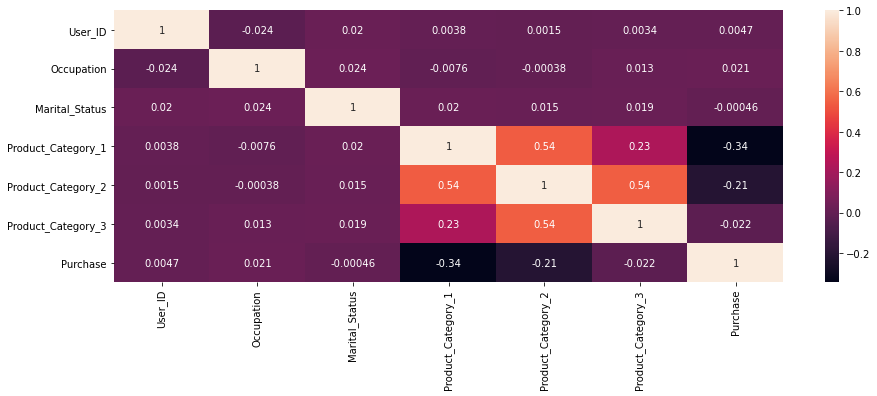

In [21]:
fig, ax= plt.subplots(figsize=(15,5))
sns.heatmap(corr_matrix, annot=True)

##### There are no correlation between various categories so most of the features are independent and they can be kept to evaluate model.

In [22]:
from scipy import stats
from scipy.stats import norm

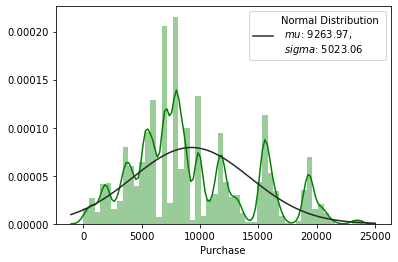

In [23]:
sns.distplot(train['Purchase'], color='green', fit=norm)

mu, sigma = norm.fit(train['Purchase'])

plt.title = 'Purchase Distribution'
plt.legend(['Normal Distribution \n $mu$: {:.2f},\n $sigma$: {:.2f}'.format(mu, sigma)], loc = 'best')
plt.show()

#### Data preparation

In [24]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

##### drop Uer_ID and Product_ID as they don't make any sense. Product_Category_3 has been removed since it is missing multiple values and also covered in cat1 & cat2. Purchase is target column.

In [25]:
train_target = train['Purchase'].copy() # get target value
train = train.drop(['User_ID','Product_ID','Product_Category_3','Purchase'], axis=1) #drop these columns


In [26]:
train.dtypes


Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
dtype: object

In [27]:
train['Stay_In_Current_City_Years'].unique() # since only 5 categories so we can use One Hot encoding

array(['2', '4+', '3', '1', '0'], dtype=object)

In [28]:
cat_col = [col for col in train.columns if train.dtypes[col] == 'object']
cat_col

['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [29]:
num_col = [col for col in train.columns if train.dtypes[col] != 'object']
num_col
train_num = train[num_col]

In [30]:
train.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
dtype: int64

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(train_num)
imputer.statistics_

array([8.07670688, 0.40965299, 5.40427002, 9.84232925])

In [32]:
train_num.mean().values

array([8.07670688, 0.40965299, 5.40427002, 9.84232925])

In [33]:
X = imputer.transform(train_num)

In [34]:
train_trans = pd.DataFrame(X, columns=train_num.columns)
train_trans.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2
0,10.0,0.0,3.0,9.842329
1,10.0,0.0,1.0,6.000000
2,10.0,0.0,12.0,9.842329
3,10.0,0.0,12.0,14.000000
4,16.0,0.0,8.0,9.842329


In [35]:
train_trans.isnull().sum()

Occupation            0
Marital_Status        0
Product_Category_1    0
Product_Category_2    0
dtype: int64

In [36]:
train_cat = train[cat_col]

In [37]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
train_1hot_cat = cat_encoder.fit_transform(train_cat)

In [38]:
cat_encoder.categories_

[array(['F', 'M'], dtype=object),
 array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
       dtype=object),
 array(['A', 'B', 'C'], dtype=object),
 array(['0', '1', '2', '3', '4+'], dtype=object)]

In [39]:
train.values

array([['F', '0-17', 10, ..., 0, 3, nan],
       ['F', '0-17', 10, ..., 0, 1, 6.0],
       ['F', '0-17', 10, ..., 0, 12, nan],
       ...,
       ['F', '26-35', 15, ..., 1, 20, nan],
       ['F', '55+', 1, ..., 0, 20, nan],
       ['F', '46-50', 0, ..., 1, 20, nan]], dtype=object)

In [40]:
# create number pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                         ('std_scaler', StandardScaler())])

train_num_tr = num_pipeline.fit_transform(train_num)

In [41]:
# OneHotEncoder for Categorical columns

In [42]:
# Single pipeline for all data

from sklearn.compose import ColumnTransformer

num_attrbs = num_col
cat_attrbs = cat_col

full_pipeline = ColumnTransformer([('num', num_pipeline, num_col),
                                   ('cat', OneHotEncoder(), cat_col)])

train_prepared = full_pipeline.fit_transform(train)

In [43]:
train_prepared.shape

(550068, 21)

#### Model Selection

In [44]:
from sklearn.model_selection import train_test_split

#train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
x_train,x_test,y_train,y_test = train_test_split(train,train_target,test_size=0.25, random_state=42)

In [45]:
X_train_prep = full_pipeline.fit_transform(x_train)
X_test_prep = full_pipeline.fit_transform(x_test)

In [46]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_prep, y_train)
lin_pred = lin_reg.predict(X_train_prep)


In [47]:
from sklearn.metrics import mean_squared_error

# housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(y_train, lin_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4691.656679063996

In [48]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_train, lin_pred)
lin_mae

3589.6050088352713

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_prep, y_train)

DecisionTreeRegressor(random_state=42)

In [50]:
train_predictions = tree_reg.predict(X_train_prep)
tree_mse = mean_squared_error(y_train, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

2508.516425372993

### Fine Tune Model

In [51]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train_prep, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [72]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [3173.20452115 3158.42100389 3188.31106869 3159.72709225 3166.53814571
 3174.95627917 3190.97079811 3167.66812828 3190.67654441 3134.39888147]
Mean: 3170.487246313635
Standard deviation: 16.61179145586556


In [53]:
lin_scores = cross_val_score(lin_reg, X_train_prep, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [4704.09068929 4675.10775792 4688.29461892 4680.93307643 4724.5942495
 4663.33134729 4689.28903528 4667.4950632  4746.07879891 4678.96030467]
Mean: 4691.817494139888
Standard deviation: 24.807406805047744


In [69]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train_prep, y_train)

RandomForestRegressor(random_state=42)

In [70]:
train_predictions = forest_reg.predict(X_train_prep)
forest_mse = mean_squared_error(y_train, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2534.587886777759

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train_prep, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [67]:
final_model = grid_search.best_estimator_

final_tr_predictions = final_model.predict(X_train_prep)

final_tr_mse = mean_squared_error(y_train, final_tr_predictions)
final_tr_rmse = np.sqrt(final_tr_mse)
final_tr_rmse

2541.394457231482

In [66]:
final_predictions = final_model.predict(X_test_prep)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

3036.5195014779024

In [71]:
test_predictions = forest_reg.predict(X_test_prep)
forest_mse = mean_squared_error(y_test, test_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

3030.200620647267

#### Verdict goes to Random forest predictor